In [223]:
import LowLevelFEM as FEM
using LowLevelFEM
using SparseArrays
using LinearAlgebra
using Plots
using Arpack

gmsh.initialize()

In [224]:
gmsh.open("wave_propagation_1D.geo")

Info    : Reading 'wave_propagation_1D.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.000654685s, CPU 0.000657s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Transfinite)
Info    : Done meshing 2D (Wall 0.00146532s, CPU 0.001412s)
Info    : 303 nodes 408 elements
Info    : Done reading 'wave_propagation_1D.geo'


In [225]:
mat = FEM.material("body", E=1.0, ν=0.3)
problem = FEM.Problem([mat], type="PlaneStress")

Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 6)


LowLevelFEM.Problem("wave_propagation_1D", "PlaneStress", 2, [("body", 1.0, 0.3, 7.85e-9)], 1.0, 303)

In [226]:
supp = FEM.displacementConstraint("supp", ux=0)
load = FEM.load("supp", fx=0);

In [227]:
dof = problem.non * problem.dim
u0 = zeros(dof)
v0 = zeros(dof);

In [228]:
K = FEM.stiffnessMatrix(problem)

606×606 SparseMatrixCSC{Float64, Int64} with 8334 stored entries:
⎡⠻⣦⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠘⢻⣶⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠉⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⢿⣷⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠘⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠿⣧⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢻⣶⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠿⣧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣷⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠿⣧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠿⣧⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢻⣶⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠿⣧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢻⣶⣀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠿⣧⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⣄⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢻⣶⣀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠻⠆⎦

In [229]:
M = FEM.massMatrix(problem)

606×606 SparseMatrixCSC{Float64, Int64} with 606 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⠄⎦

In [230]:
f = FEM.loadVector(problem, [load])
dof

606

In [231]:
C = K * 0
FEM.applyBoundaryConditions!(problem, K, M, C, f, [supp]);

In [232]:
Tₘᵢₙ = FEM.smallestPeriodTime(K, M)

0.0002637373823442134

In [233]:
(2π / Tₘᵢₙ)^2

5.67565977436288e8

In [234]:
Tₘₐₓ = FEM.largestPeriodTime(K, M)

1.6291188820159168

In [235]:
(2π / Tₘₐₓ)^2

14.874904360370312

In [236]:
ω², ϕ = Arpack.eigs(K, M, nev=100, which=:SR, maxiter=1000)
ω²

100-element Vector{ComplexF64}:
 -2.0565501481927088e-7 + 0.0im
      0.999999727449124 + 0.0im
     0.9999998934049288 + 0.0im
     0.9999999420516641 + 0.0im
      14.87490437467919 + 0.0im
      432.7251395984734 + 0.0im
      2621.663073981345 + 0.0im
      8983.243486517104 + 0.0im
     22858.946690740122 + 0.0im
      31430.95158510178 + 0.0im
                        ⋮
    9.629371805616497e7 + 0.0im
    9.810704602920958e7 + 0.0im
    9.845093016169558e7 + 0.0im
      9.8978430225083e7 + 0.0im
    9.923030640179306e7 + 0.0im
     9.98737407206404e7 + 0.0im
   1.0087883987927282e8 + 0.0im
   1.0164657258570082e8 + 0.0im
    1.020605252227761e8 + 0.0im

In [237]:
ω², ϕ = eigen(collect(K), collect(M), sortby=abs)
Δt = 2π ./ .√(real.(abs.(ω²)))
ω²

606-element Vector{Float64}:
    -2.8626021427187565e-8
     1.0
     1.0
     1.0
    14.874904513334805
   432.72513993597164
  2621.663074425858
  8983.243486717914
 22858.94669095119
 31430.95158492415
     ⋮
     5.586660472651917e8
     5.590624860308018e8
     5.593751643573314e8
     5.59496237515044e8
     5.597862038833144e8
     5.598052897079071e8
     5.599314381733688e8
     5.635443180535656e8
     5.67565977436289e8

In [238]:
FEM.initialDisplacement!(problem, "supp", u0, ux=0)
FEM.initialVelocity!(problem, "body", v0, vx=1000)
FEM.initialVelocity!(problem, "supp", v0, vx=0)

In [239]:
α = -0.029
δ = 0.0477

0.0477

In [240]:
ξ = [0.01, 0, 0.005]

3-element Vector{Float64}:
 0.01
 0.0
 0.005

In [241]:
ωₘᵢₙ = 2π / Tₘₐₓ
ωₘₐₓ = 2π / Tₘᵢₙ
Δt = Tₘᵢₙ / π * (√(1 + sum(ξ)^2) - sum(ξ)) * 0.98

8.104639864653775e-5

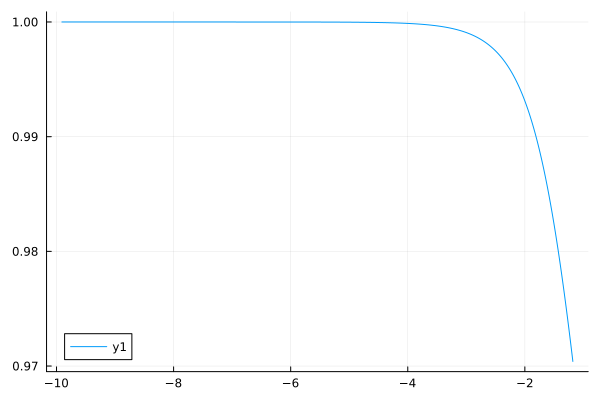

In [242]:
plt = FEM.HHTaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt, "SR", n=1000, α=α, δ=δ)
plot(plt)

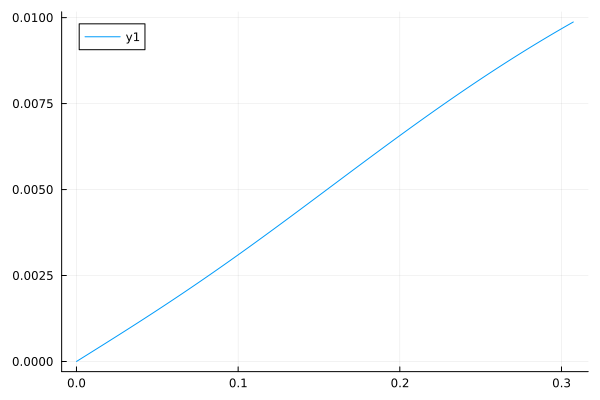

In [243]:
plt = FEM.HHTaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt, "ADR", n=1000, α=α, δ=δ)
plot(plt)

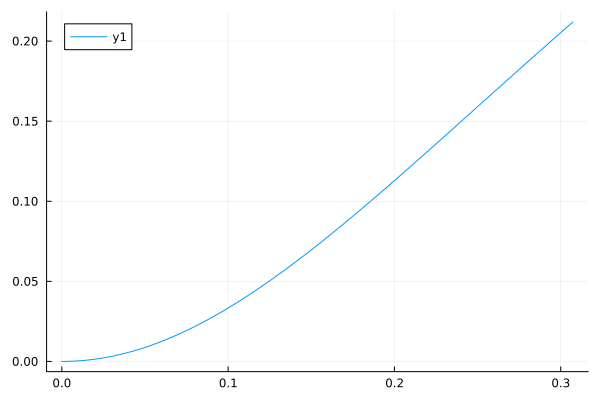

In [244]:
plt = FEM.HHTaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt, "PE", n=1000, α=α, δ=δ)
plot(plt)

In [245]:
u1, v1, t1 = FEM.HHT(K, M, f, u0, v0, 300Δt, Δt, α=α, δ=δ)

([0.0 0.0 … 0.0 0.0; 0.0 0.006777474538809738 … -0.02773572837773409 -0.027282658277222822; … ; 0.0 0.08104639864653773 … -6.432471609781283 -6.512579747130994; 0.0 -3.5389047577123336e-19 … 0.0006367198751713721 -0.00033868130576933674], [0.0 0.0 … 0.0 0.0; 0.0 166.90256755593654 … 2.420424839520024 8.763898833353274; … ; 1000.0 1000.0 … -989.7539214815233 -987.0820958601535; 0.0 -8.714931897063806e-15 … -11.202647935362261 -12.878108509644902], [0.0, 8.104639864653775e-5, 0.0001620927972930755, 0.00024313919593961324, 0.000324185594586151, 0.00040523199323268873, 0.0004862783918792265, 0.0005673247905257642, 0.000648371189172302, 0.0007294175878188397  …  0.023503455607495855, 0.023584502006142392, 0.02366554840478893, 0.023746594803435467, 0.023827641202082004, 0.02390868760072854, 0.02398973399937508, 0.024070780398021616, 0.024151826796668153, 0.02423287319531469])

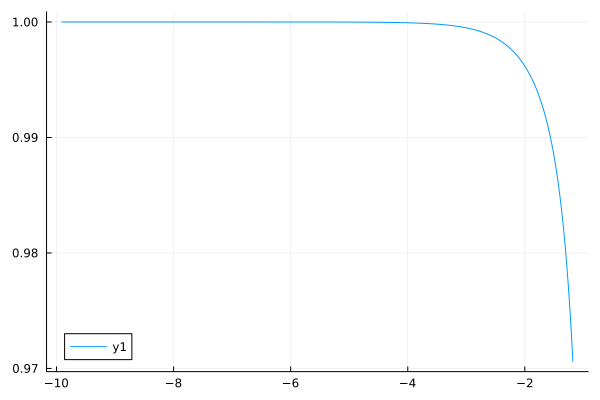

In [246]:
plt = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt, "SR", n=1000, ξ=ξ)
plot(plt)

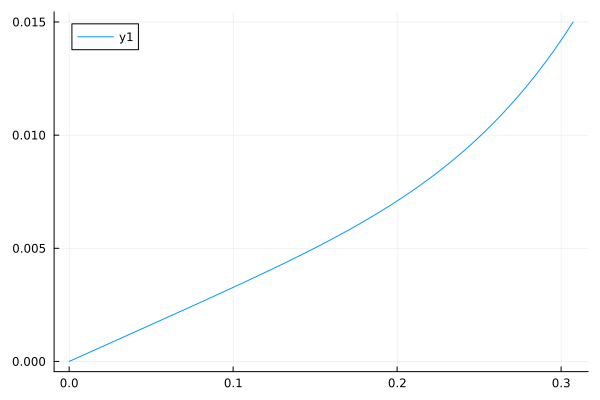

In [247]:
plt = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt, "PDR", n=1000, ξ=ξ)
plot(plt)

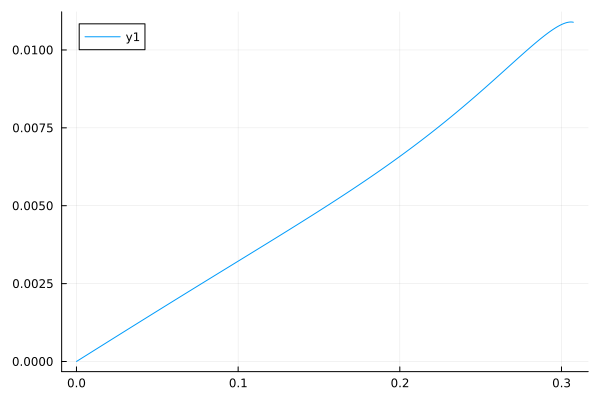

In [248]:
plt = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt, "ADR", n=1000, ξ=ξ)
plot(plt)

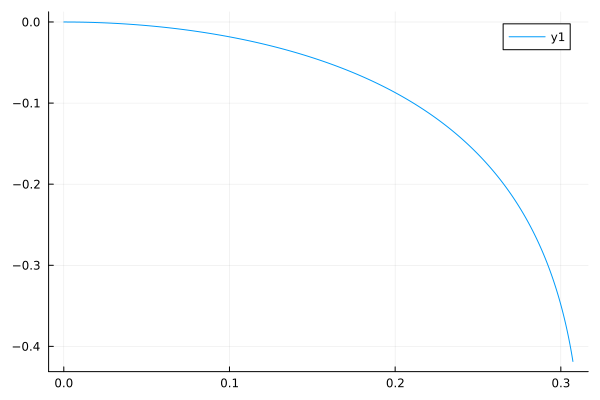

In [249]:
plt = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt, "PE", n=1000, ξ=ξ)
plot(plt)

In [250]:
C = FEM.dampingMatrix(M, K, ωₘₐₓ, ξ=ξ)

606×606 SparseMatrixCSC{Float64, Int64} with 24878 stored entries:
⎡⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣶⡄⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠿⠿⠇⎦

In [251]:
u2, v2, t2 = FEM.CDM(K, M, C, f, u0, v0, 300Δt, Δt)

([0.0 0.0 … 0.0 0.0; 0.0 0.0002947433307991428 … -0.02660250725997127 -0.025903850424700493; … ; 0.0 0.08104639864653775 … -6.429824437588387 -6.511217361519703; 0.0 0.0 … -0.0026064314203788123 -0.0019754449744974405], [0.0 0.0 … 0.0 0.0; 0.0 3.636723355032556 … 7.157189362656863 8.620455034871863; … ; 1000.0 1000.0 … -986.6203021692326 -1004.2756407510469; 0.0 0.0 … -16.696352561483344 7.785496412163246], [0.0, 8.104639864653775e-5, 0.0001620927972930755, 0.00024313919593961324, 0.000324185594586151, 0.00040523199323268873, 0.0004862783918792265, 0.0005673247905257642, 0.000648371189172302, 0.0007294175878188397  …  0.023503455607495855, 0.023584502006142392, 0.02366554840478893, 0.023746594803435467, 0.023827641202082004, 0.02390868760072854, 0.02398973399937508, 0.024070780398021616, 0.024151826796668153, 0.02423287319531469])

In [252]:
S1 = FEM.solveStress(problem, u1)

LowLevelFEM.StressField([[0.0 -1.0473632703298548e-19 … 0.0002967276631852476 1.3202195515505207e-5; 0.0 -1.0675221390626503e-17 … 3.301533230462347e-5 -2.4492457717346815e-5; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 3.0722036061494833e-17 … -0.00019488123156464376 0.0002981699442893449; 0.0 1.0675221390626503e-17 … -0.00030825905009297547 0.0002385877471886224; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 -2.0793566969229808e-19 … 0.0004930149140955456 -8.930685334848161e-5; 0.0 0.0 … 0.00018690695538631653 -0.000183865463299071; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 -3.7705017033431246e-19 … 2.7295752260035665e-5 0.0002456703509405647; 0.0 -5.337610695313251e-18 … -0.00013619593692905702 0.0001388490351187462; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 -2.952398865890028e-19 … -2.4090721605040585e-5 -0.00011616127681398073; 0.0 0.0 … -4.580472217040865e-5 -7.243070290515653e-5; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 1.5028355934023747e-17 … 0.0001127

In [253]:
S2 = FEM.solveStress(problem, u2)

LowLevelFEM.StressField([[0.0 1.218478578616427e-20 … -0.0002638826324749626 -0.00045084096672690186; 0.0 0.0 … -0.0001420368645858124 -9.46456153757461e-5; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 2.3683237472264114e-21 … 0.0017231617419685673 0.0009684139181822569; 0.0 0.0 … 0.0015827999064801706 0.001036015766126424; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 5.1635409445509435e-21 … -0.0008984593666022625 -0.0006999157353339303; 0.0 0.0 … -0.0011604309263963256 -0.0006754666354288254; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 -1.3621370467615836e-20 … 0.0013428781566041984 0.0005306319928073794; 0.0 0.0 … 0.0008873343754236025 0.0005392765564101645; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 -1.1926411803619431e-20 … -0.00014506778258770284 0.00012263836493462373; 0.0 0.0 … -0.000328760952595503 -0.00013673246784857873; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 2.875717780677126e-20 … -0.00014478269502804286 -9.009030486156335e-5; 0.0 0.0 … 0.0001028662

In [254]:
sx1 = FEM.showStressResults(problem, S1, "sx", name="σx1(t)", t=t1, visible=false, smooth=true)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


0

In [255]:
sx2 = FEM.showStressResults(problem, S2, "sx", name="σx2(t)", t=t2, visible=false, smooth=true)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


1

In [256]:
ph1 = FEM.plotOnPath(problem, "path", sx1, 500, name="σx HHT", visible=true)

2

In [257]:
ph2 = FEM.plotOnPath(problem, "path", sx2, 500, name="σx CDM", visible=true)

3

In [258]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.12.2
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 19700101
Build host    : amdci7.julia.csail.mit.edu
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.6.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


XRequest.18: BadValue 0x0


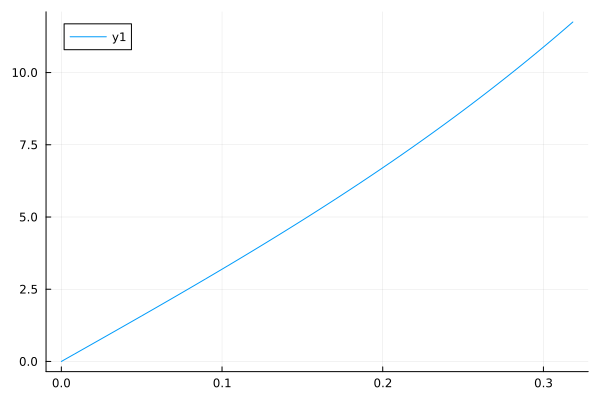

In [268]:
plt = FEM.CDMaccuracyAnalysis(0.0001, 1, 1 * 2, "PDR", n=1000, β=[2, 2 / 6, 2 / 120])
plot(plt)

In [222]:
gmsh.finalize()